<a href="https://colab.research.google.com/github/ProfAndersonVanin/aulas_PA_2024/blob/main/Aluguel_Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula Introdutória de Análise de Dados**

**Objetivo:**

Nesta aula, você aprenderá o processo de análise de dados utilizando ferramentas como o Google Colab e bases de dados do Kaggle.

# **Principais Passos para Análise de Dados:**
1. **Definição do Problema:**
- Qual a questão a ser resolvida? O que esperamos descobrir com a análise?
2. **Coleta de Dados:**
- Obtenção de dados de fontes como APIs, arquivos CSV, ou sites como o Kaggle.
3. **Exploração de Dados:**
- Inspeção dos dados: tipos de dados, presença de valores ausentes, outliers, e estatísticas descritivas básicas.
4. **Limpeza de Dados:**
- Tratamento de dados faltantes, remoção de duplicatas e correção de inconsistências.
5. **Visualização de Dados:**
- Criação de gráficos para identificar padrões, tendências e correlações entre variáveis.
6. **Conclusão e Comunicação:**
- Interpretação dos resultados, criação de relatórios e apresentação de insights.

# **Fontes de Dados Utilizadas:**
Para esta aula, utilizaremos:
- Base de Dados de Aluguel de Bicicletas: [Link no Kaggle](https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset)



---



# **Conhecendo a Base de Dados**

Antes de mais nada, vamos fazer a importação de algumas bibliotecas para as análises dos dados. Estas bibliotecas são comuns na maioria das análises. Caso precise de alguma biblioteca adicional, a mesma pode ser importada nas células abaixo.

In [ ]:
# IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CARREGAR OS DADOS
df = pd.read_csv("https://raw.githubusercontent.com/ProfAndersonVanin/aulas_PA_2024/refs/heads/main/bikes_day.csv")
df.head()

## Colunas e significados do dataset:

- **instant**: Registro do indice
- **dteday**: Data
- **season**: Estação do ano (1:primavera, 2:verão, 3:outono, 4:inverno)
- **yr**: Ano (0: 2011, 1:2012)
- **mnth**: Mês (1 a 12)
- **hr**: Horas (0 a 23)
- **holiday**: Feriado ou Não
- **weekday**: Dia da Semana (0 = segunda-feira, 1 = terça-feira, 2 = quarta-feira, 3 = quinta-feira, 4 = sexta-feira, 5 = sábado, 6 = domingo)
- **workingday**: Se o dia não for fim de semana nem feriado será 1, caso contrário será 0.
- **weathersit**: (extraído do Freemeteo)
  - **1**: Claro, Poucas nuvens, Parcialmente nublado, Parcialmente nublado
  - **2**: Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Poucas nuvens, Névoa
  - **3**: Neve fraca, Chuva fraca + Trovoada + Nuvens dispersas, Chuva fraca + Nuvens dispersas
  - **4**: Chuva Forte + Paletes de Gelo + Trovoada + Névoa, Neve + Nevoeiro
- **temp**: Temperatura normalizada em Celsius. Os valores são derivados via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (somente na escala horária)
- **atemp**: Temperatura de sensação normalizada em Celsius. Os valores são derivados via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (somente em escala horária)
- **hum**: Umidade normalizada. Os valores são divididos por 100 (máx.)
- **windspeed**: Velocidade do vento normalizada. Os valores são divididos por 67 (máx.)
- **casual**: contagem de usuários casuais
- **registered**: contagem de usuários registrados
- **cnt**: contagem do total de bicicletas alugadas, incluindo casuais e registradas



---



# **1. Definição do Problema:**
Qual a questão a ser resolvida? O que esperamos descobrir com a análise?

  1. *Como a temperatura influencia o número de bicicletas alugadas ao longo do ano?*
  2. *A estação do ano influencia no número de bicicletas alugadas?*
  3. *Quais são os dias da semana com maior número de aluguéis?*

A análise tem o objetivo de identificar padrões no aluguel de bicicletas com base em variáveis como temperatura, hora do dia e dia da semana. Esperamos descobrir correlações e padrões sazonais ou comportamentais.

# **2 - Coleta de Dados:**
**Fonte de Dados:** A base de dados utilizada é do Kaggle, chamada `Bike Sharing Dataset`. O dataset contém informações sobre o número de bicicletas alugadas em diferentes horários e condições meteorológicas.

***Já foi feita nos ítens anteriores!***

# **3 - Exploração de Dados:**

Neste passo, inspecionamos a estrutura dos dados, verificamos a presença de valores faltantes e geramos estatísticas descritivas.

In [ ]:
# Verificando valores faltantes
df.isnull().sum()

In [ ]:
# Exibindo informações gerais dos dados
df.info()

In [ ]:
# Estatísticas descritivas
df.describe()

> *Essa exploração inicial nos permite entender melhor os dados e preparar o terreno para os próximos passos.*
😊


# **4 - Limpeza de Dados:**

Limpeza de Dados é o processo de preparar os dados brutos para análise, garantindo que estejam consistentes, corretos e livres de erros. Isso inclui:

- **Tratamento de valores faltantes:** Preenchendo ou removendo valores ausentes.
Remoção de duplicatas: Eliminando dados duplicados que podem distorcer a análise.
- **Correção de inconsistências:** Ajustando formatos incorretos ou padrões de dados que não seguem uma estrutura definida (como datas ou categorias).
- **Transformações necessárias:** Criando novas colunas a partir de dados existentes para facilitar a análise, como extrair hora e dia da semana a partir de uma data.
Esses passos garantem que a análise seja precisa e confiável.

# **5 - Visualização de Dados:**
Vamos agora criar gráficos para responder às perguntas formuladas na fase de Definição do Problema.

**Pergunta 1:** *Como a temperatura influencia o número de bicicletas alugadas?*

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Influência da Temperatura no Aluguel de Bicicletas')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.show()

Observe o gráfico. Nele temos uma escala de temperatura em °C normalizada. Caso deseje ver em °C você pode voltar no passo 4 e fazer a transformação.

Nesta transformação você pode criar uma nova coluna e armazenar os valores novos nela sem a perda da informação original.

Do dataset original temos que:

- **temp**: Temperatura normalizada em Celsius. Os valores são derivados via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (somente na escala horária)

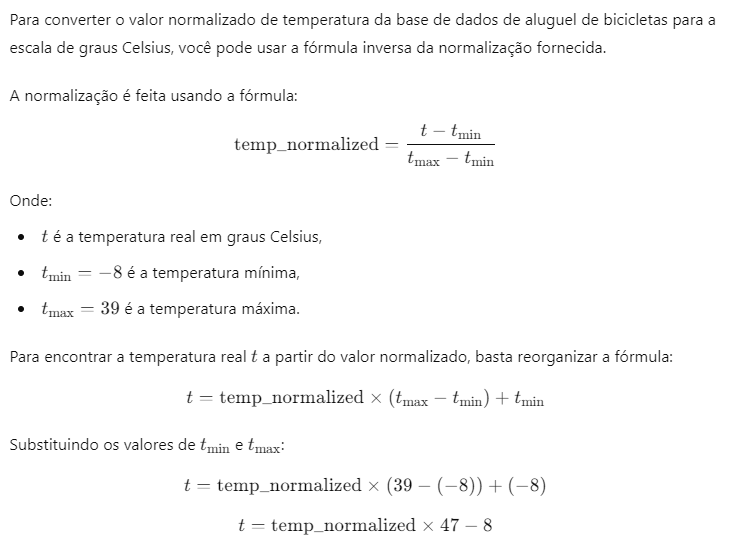

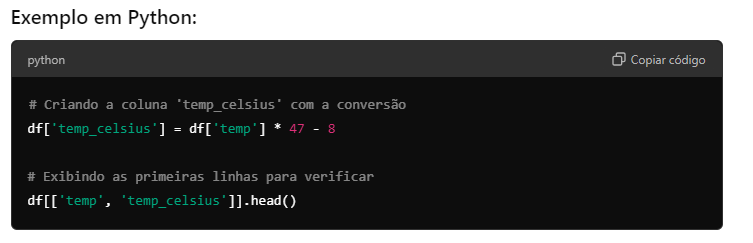

**Pergunta 2:** *A estação do ano influencia no número de bicicletas alugadas?*

In [ ]:
# Gráfico de barras para o número de aluguéis por estação
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', data=df)
plt.title('Número de Aluguéis por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()

> **Perceba que precisamos de uma legenda para entender quais são as estações do ano. Assim fica difícil para o usuário entender o significado.**



In [ ]:
# Criando uma coluna para a estação do ano

# 1:primavera, 2:verão, 3:outono, 4:inverno

def definir_estacao(mes):
    if mes == 1:
        return 'Primavera'
    elif mes == 2:
        return 'Verão'
    elif mes == 3:
        return 'Outono'
    else:
        return 'Inverno'

df['estacao'] = df['season'].apply(definir_estacao)

In [ ]:
df.head()

In [ ]:
df['season'].value_counts()

In [ ]:
# Gráfico de barras para o número de aluguéis por estação
plt.figure(figsize=(10,6))
sns.barplot(x='estacao', y='cnt', data=df)
plt.title('Número de Aluguéis por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()

**Pergunta 3:** *Quais são os dias da semana com maior número de aluguéis?*

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='cnt', data=df)
plt.title('Número de Aluguéis por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Aluguéis')
plt.show()

# **6 - Conclusão e Comunicação:**

**Conclusão 1: Influência da Temperatura**

A partir do gráfico de dispersão, observamos que há uma correlação positiva entre a temperatura e o número de bicicletas alugadas. Quando a temperatura aumenta, o número de aluguéis também cresce. Isso sugere que, em dias mais quentes, as pessoas tendem a alugar mais bicicletas, possivelmente para lazer ou atividades ao ar livre.

**Conclusão 2: Influência da Estação do Ano**

Aqui descreva sua conclusão. Será que há algo errado com a base de dados?

> *Poderíamos ter uma conclusão como por exemplo:* O gráfico de barras mostra que o Verão apresenta o maior número de aluguéis de bicicletas, seguido pela Primavera. O Inverno tem o menor número de aluguéis, o que é esperado, pois o clima frio pode desencorajar o uso de bicicletas. O Outono também apresenta um número reduzido de aluguéis em comparação com as estações mais quentes. Isso sugere que o clima tem um impacto significativo no uso de bicicletas, com a maioria dos usuários optando por alugar durante as estações mais amenas e quentes.

**Conclusão 3: Aluguéis por Dia da Semana**

0 = segunda-feira, 1 = terça-feira, 2 = quarta-feira, 3 = quinta-feira, 4 = sexta-feira, 5 = sábado, 6 = domingo


Aqui descreva sua conclusão. Será que há algo errado com a base de dados?

> *Poderíamos ter uma conclusão como por exemplo:*O gráfico de barras revela que os dias úteis (segunda a sexta-feira) têm um número maior de aluguéis em comparação aos fins de semana. Isso sugere que a demanda por bicicletas está mais relacionada com deslocamentos durante dias úteis, enquanto no fim de semana o uso tende a cair.



---



# **OUTRAS OBSERVAÇÕES**

A medida que vamos analisando a base de dados, outras perguntass podem surgir sugerindo outros tipos de observações e/ou gráficos.

**Pergunta Extra 1:** Quantidade de aluguéis por mês

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=df, estimator=sum, hue='mnth', palette='viridis', dodge=False, legend=False)
plt.title('Distribuição de Aluguel de Bicicletas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Aluguéis')
plt.xticks(rotation=45)
plt.show()

**Pergunta Extra 2:** Quantidade de bicicletas alugadas ao longo do tempo

In [ ]:
df.head()

In [ ]:
# Passo 1: Garantir que a coluna 'datetime' está no formato datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Passo 2: Agrupar os dados por data e contar o número total de aluguéis
df['data'] = df['dteday'].dt.date  # Extrair a data
alugueis_por_data = df.groupby('data')['cnt'].sum().reset_index()

# Passo 3: Visualizar os resultados
plt.figure(figsize=(14, 6))
sns.lineplot(x='data', y='cnt', data=alugueis_por_data, marker='o')
plt.title('Quantidade de Bicicletas Alugadas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Aluguéis')
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.grid()
plt.tight_layout()
plt.show()

**Pergunta Extra 3**: Comparar o total de bicicletas alugadas em diferentes condições climáticas

In [ ]:
# Boxplot para comparar o total de bicicletas alugadas em diferentes condições climáticas
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Impacto das Condições Climáticas no Aluguel de Bicicletas')
plt.xlabel('Condições Climáticas')
plt.ylabel('Total de Aluguéis')
plt.show()

In [ ]:
df['weathersit'].unique()

**Pergunta Extra 4**: Gráfico de barras para comparar o aluguel em dias de feriado e não feriado

In [ ]:
# Gráfico de barras para comparar o aluguel em dias de feriado e não feriado
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=df, estimator=sum)
plt.title('Impacto dos Feriados no Aluguel de Bicicletas')
plt.xlabel('Feriado (1) ou Não (0)')
plt.ylabel('Total de Aluguéis')
plt.show()

**Pergunta Extra 5**: Qual a quantidade de aluguéis por tipo de usuário: Registrado/Casual

In [ ]:
sns.scatterplot(df[['registered', 'casual']])
ax2 = plt.twinx()
#sns.lineplot((df.temp), color='r')

In [ ]:
# Gráfico de barras empilhadas para mostrar a proporção de usuários casuais e registrados
df_users = df[['casual', 'registered']].sum().reset_index()
df_users.columns = ['Tipo de Usuário','Total']
df_users.plot(kind='bar', x='Tipo de Usuário', y='Total', stacked=True, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Composição do Total de Aluguéis')
plt.ylabel('Total de Aluguéis')
plt.show()

**Pergunta Extra 6**: Avaliar a correlação entre variáveis numéricas.

In [ ]:
# Passo 2: Calcular a matriz de correlação usando apenas colunas numéricas
correlation_matrix = df.select_dtypes(include='number').corr()

# Passo 3: Criar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()

# **Exercício**

Realizar uma análise semelhante em uma base de dados diferente disponível no Kaggle, explorando as principais variáveis e criando gráficos que ajudem a entender os padrões presentes nos dados.

Aqui estão alguns links de bases de dados no Kaggle que podem ser utilizadas para o exercício proposto:

- **Titanic - Machine Learning from Disaster (Análise de sobreviventes)**:
https://www.kaggle.com/c/titanic/data

- **House Prices - Advanced Regression Techniques (Preços de casas nos EUA)**:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- **Wine Quality Dataset (Avaliação de vinhos)**:
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

- **Global Superstore Dataset (Vendas globais de uma loja)**:
https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

- **Airbnb New York City Listings (Aluguéis de curta duração em NYC)**:
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data